# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
def british_quality(df):
    # this function applies many exploratory techniques to a given dataframe
    display("Head",
            df.head()
            .style
            .background_gradient(cmap='Blues')
           )
    display("Data Types",
            df.dtypes
            .to_frame()
           )
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column",
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics",
            df.describe()
           )
    display("Correlation Matrix",
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )

In [3]:
ds = pd.read_csv('set.csv')
british_quality(ds)

'Head'

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249,19384.7,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668.1,C2048537720,41554,29885.9,M1230701703,0,0,0,0


'Data Types'

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


'Data Types Count'

,0
float64,5
object,3
int64,3


'Nan Values per Column'

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


'Descriptive Statistics'

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


'Correlation Matrix'

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1,0.022,-0.01,-0.01,0.028,0.026,0.032,0.0033
amount,0.022,1,-0.0028,-0.0079,0.29,0.46,0.077,0.012
oldbalanceOrg,-0.01,-0.0028,1,1,0.066,0.042,0.01,0.0038
newbalanceOrig,-0.01,-0.0079,1,1,0.068,0.042,-0.0081,0.0038
oldbalanceDest,0.028,0.29,0.066,0.068,1,0.98,-0.0059,-0.00051
newbalanceDest,0.026,0.46,0.042,0.042,0.98,1,0.00054,-0.00053
isFraud,0.032,0.077,0.01,-0.0081,-0.0059,0.00054,1,0.044
isFlaggedFraud,0.0033,0.012,0.0038,0.0038,-0.00051,-0.00053,0.044,1


### What is the distribution of the outcome? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B1C2A5B00>,
      dtype=object)

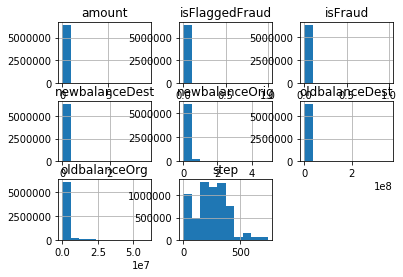

In [4]:
ds.hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [18]:
#### I would organize it on paymentmethode and apply machine learning per type. ds['type'].value_counts()

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [35]:
ds['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [51]:
cash_out = ds[(ds['type'] == 'CASH_OUT')].drop(['type', 'nameOrig', 'nameDest'], axis=1)
payment = ds[(ds['type'] == 'PAYMENT')].drop(['type', 'nameOrig', 'nameDest'], axis=1)
cash_in = ds[(ds['type'] == 'CASH_IN')].drop(['type', 'nameOrig', 'nameDest'], axis=1)
transfer = ds[(ds['type'] == 'TRANSFER')].drop(['type', 'nameOrig', 'nameDest'], axis=1)
debit = ds[(ds['type'] == 'DEBIT')].drop(['type', 'nameOrig', 'nameDest'], axis=1)

### Run a logisitc regression classifier and evaluate its accuracy.

In [58]:
X = cash_out.drop('step', axis=1).values 
y = cash_out['step'].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr = LinearRegression()
model = regr.fit(X_std, y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)
model.score(X_test, y_test)


0.009831475350035923

In [59]:
X = payment.drop('step', axis=1).values 
y = payment['step'].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr = LinearRegression()
model = regr.fit(X_std, y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)
model.score(X_test, y_test)

0.009568195485601616

In [60]:
X = cash_in.drop('step', axis=1).values 
y = cash_in['step'].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr = LinearRegression()
model = regr.fit(X_std, y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)
model.score(X_test, y_test)

0.007971513538647113

In [61]:
X = transfer.drop('step', axis=1).values 
y = transfer['step'].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr = LinearRegression()
model = regr.fit(X_std, y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)
model.score(X_test, y_test)

0.013903388770163285

In [62]:
X = debit.drop('step', axis=1).values 
y = debit['step'].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
regr = LinearRegression()
model = regr.fit(X_std, y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)
model.score(X_test, y_test)

0.008607940927457203

In [ ]:
###the scores for accuracy are really low. 

### Now pick a model of your choice and evaluate its accuracy.

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
X = cash_out.drop('step', axis=1).values 
y = cash_out['step'].values
regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.8790536718206358

In [65]:
X = payment.drop('step', axis=1).values 
y = payment['step'].values
regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.9905763477637576

In [66]:
X = cash_in.drop('step', axis=1).values 
y = cash_in['step'].values
regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.9453785508307733

In [67]:
X = transfer.drop('step', axis=1).values 
y = transfer['step'].values
regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.8706615482456038

In [68]:
X = debit.drop('step', axis=1).values 
y = debit['step'].values
regr = DecisionTreeRegressor(random_state = 29)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)
model = regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.969602498152927

### Which model worked better and how do you know?

In [9]:
### the desicion tree works better, but there is a strong negative R2 which means that the correlation is negative
### Which is a bit hard to interpretert, but it would still be a too little precision to detect fraud compeletely 
### by machines, a bit of human work would be needed. 